In [1]:
import pickle
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

In [2]:
noise_list = ['15%', '12.5%', '10%', '7.5%', '5%', '2.5%']
thresold_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
noise = []
threshold = []
for x in noise_list:
    noise.append(x)
    noise.append(x)
    noise.append(x)
    noise.append(x)
    noise.append(x)
    noise.append(x)

for y in range(6):
    for t in thresold_list:
        threshold.append(t)

In [3]:
rf_precision = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])
rf_recall = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])
rf_fscore = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])

rf_normalfscore = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])

iforest_normalfscore = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])
iforest_anofscore = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])


In [4]:
rf_precision['Noise'] = noise
rf_precision['Threshold'] = threshold
rf_precision['Value'] = 0

rf_recall['Noise'] = noise
rf_recall['Threshold'] = threshold
rf_recall['Value'] = 0

rf_fscore['Noise'] = noise
rf_fscore['Threshold'] = threshold
rf_fscore['Value'] = 0


rf_normalfscore['Noise'] = noise
rf_normalfscore['Threshold'] = threshold
rf_normalfscore['Value'] = 0

iforest_normalfscore['Noise'] = noise
iforest_normalfscore['Threshold'] = threshold
iforest_normalfscore['Value'] = 0

iforest_anofscore['Noise'] = noise
iforest_anofscore['Threshold'] = threshold
iforest_anofscore['Value'] = 0

In [5]:
rf_precision.loc[:5,'Value']=[0.380272109,0.358583595,0.312201772,0.274015302,0.249874812,0.233910035]
rf_precision.loc[6:11,'Value']=[0.331628926,0.313043478,0.275641026,0.246726396,0.222836096,0.206655481]
rf_precision.loc[12:17,'Value']=[0.313531353,0.301784329,0.264812576,0.231825114,0.211433757,0.196694215]
rf_precision.loc[18:23,'Value']=[0.244038156,0.233550682,0.204672897,0.177254902,0.160776161,0.146848805]
rf_precision.loc[24:29,'Value']=[0.213084112,0.202467344,0.173938336,0.152109912,0.134615385,0.12177264]
rf_precision.loc[30:35,'Value']=[0.113520408,0.110542477,0.094262295,0.082220661,0.074709124,0.064176749]


In [6]:
rf_recall.loc[:5,'Value']=[0.540618956,0.773694391,0.885880077,0.935203095,0.965183752,0.98065764]
rf_recall.loc[6:11,'Value']=[0.604527297,0.814913449,0.916111851,0.953395473,0.966711052,0.984021305]
rf_recall.loc[12:17,'Value']=[0.585215606,0.798767967,0.899383984,0.936344969,0.95687885,0.977412731]
rf_recall.loc[18:23,'Value']=[0.638253638,0.819126819,0.910602911,0.93970894,0.964656965,0.983367983]
rf_recall.loc[24:29,'Value']=[0.708074534,0.866459627,0.928571429,0.962732919,0.97826087,0.98136646]
rf_recall.loc[30:35,'Value']=[0.729508197,0.885245902,0.942622951,0.959016393,1,1]


In [7]:

rf_fscore.loc[:5,'Value']=[0.446485623,0.490045942,0.461693548,0.423843962,0.396976929,0.377723971]
rf_fscore.loc[6:11,'Value']=[0.428301887,0.45232816,0.423775793,0.39200657,0.362185084,0.34157615]
rf_fscore.loc[12:17,'Value']=[0.408309456,0.438063063,0.409154601,0.371638142,0.346339651,0.32748538]
rf_fscore.loc[18:23,'Value']=[0.353076481,0.363468635,0.334223579,0.298251402,0.275616276,0.255537547]
rf_fscore.loc[24:29,'Value']=[0.327586207,0.328235294,0.292993631,0.262711864,0.236664162,0.216660953]
rf_fscore.loc[30:35,'Value']=[0.196467991,0.196542311,0.171385991,0.151456311,0.139031339,0.120612951]


In [8]:

rf_normalfscore.loc[:5,'Value']=[0.886579378,0.854699363,0.801413165,0.741265623,0.687293729,0.642864778]
rf_normalfscore.loc[6:11,'Value']=[0.892951775,0.861959762,0.816478666,0.773112677,0.728930351,0.687438289]
rf_normalfscore.loc[12:17,'Value']=[0.898873653,0.871854135,0.829583726,0.783122363,0.744071002,0.70632417]
rf_normalfscore.loc[18:23,'Value']=[0.912810974,0.889369889,0.854837368,0.816811644,0.78368071,0.748080439]
rf_normalfscore.loc[24:29,'Value']=[0.919115105,0.898615057,0.867893436,0.835910977,0.802756746,0.772568926]
rf_normalfscore.loc[30:35,'Value']=[0.936860364,0.922113434,0.899765639,0.879625379,0.858533845,0.829155863]


In [9]:

iforest_normalfscore.loc[:5,'Value']=[0.920249908,0.913725199,0.901712303,0.889502762,0.877632506,0.860582711]
iforest_normalfscore.loc[6:11,'Value']=[0.936504162,0.925353925,0.911105639,0.89605615,0.882387958,0.861942897]
iforest_normalfscore.loc[12:17,'Value']=[0.941619586,0.933930571,0.920728929,0.905314458,0.888309842,0.867622055]
iforest_normalfscore.loc[18:23,'Value']=[0.960636635,0.949592558,0.93486252,0.917941794,0.898384256,0.875019602]
iforest_normalfscore.loc[24:29,'Value']=[0.971247021,0.960373711,0.94435325,0.927962561,0.900120337,0.873336271]
iforest_normalfscore.loc[30:35,'Value']=[0.983981693,0.968942036,0.944103613,0.912825915,0.877765687,0.844220166]


In [10]:

iforest_anofscore.loc[:5,'Value']=[0.030384272,0.083662194,0.111792774,0.14893617,0.198872373,0.233112583]
iforest_anofscore.loc[6:11,'Value']=[0.031438936,0.081188119,0.139793487,0.156037992,0.178253119,0.188331627]
iforest_anofscore.loc[12:17,'Value']=[0.018621974,0.069400631,0.112244898,0.137420719,0.158786798,0.180451128]
iforest_anofscore.loc[18:23,'Value']=[0.024647887,0.098064516,0.148076923,0.164885496,0.161718256,0.155720339]
iforest_anofscore.loc[24:29,'Value']=[0.032085561,0.102189781,0.130769231,0.136272545,0.126315789,0.112415071]
iforest_anofscore.loc[30:35,'Value']=[0.02,0.050761421,0.062857143,0.049760766,0.042613636,0.039193084]


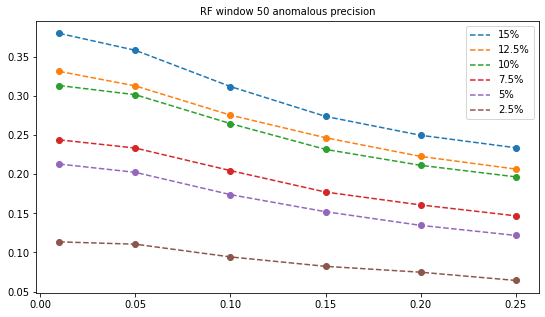

In [12]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = rf_precision[rf_precision['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('RF window 50 anomalous precision',fontsize=10)
# plt.ylim([0.5,1])
plt.legend()
plt.show()

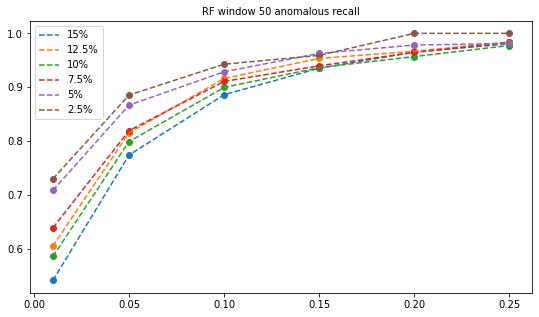

In [13]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = rf_recall[rf_recall['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('RF window 50 anomalous recall',fontsize=10)
# plt.ylim([0.5,1])
plt.legend()
plt.show()

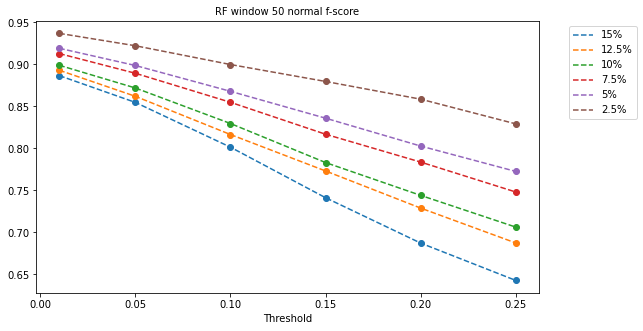

In [14]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = rf_normalfscore[rf_normalfscore['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('RF window 50 normal f-score',fontsize=10)
# plt.ylim([0.5,1])
plt.xlabel('Threshold')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

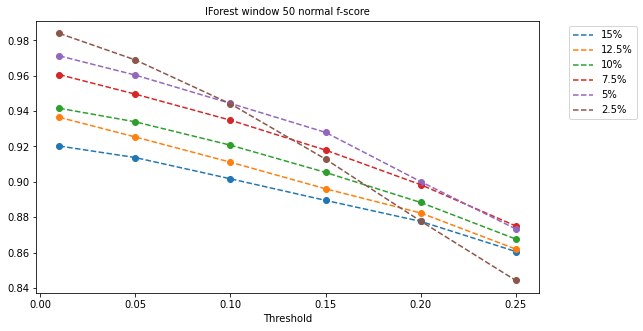

In [15]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = iforest_normalfscore[iforest_normalfscore['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('IForest window 50 normal f-score',fontsize=10)
# plt.ylim([0.5,1])
plt.xlabel('Threshold')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [23]:
spnormal_precision = pd.DataFrame(columns=['Noise', 'RF', 'XGB', 'LSTM'])
spnormal_recall = pd.DataFrame(columns=['Noise', 'RF', 'XGB', 'LSTM'])
spnormal_fscore = pd.DataFrame(columns=['Noise', 'RF', 'XGB', 'LSTM'])

spanomal_precision = pd.DataFrame(columns=['Noise', 'RF', 'XGB', 'LSTM'])
spanomal_recall = pd.DataFrame(columns=['Noise', 'RF', 'XGB', 'LSTM'])
spanomal_fscore = pd.DataFrame(columns=['Noise', 'RF', 'XGB', 'LSTM'])

In [24]:
spnormal_precision['Noise'] = noise_list
spnormal_recall['Noise'] = noise_list
spnormal_fscore['Noise'] = noise_list

spanomal_precision['Noise'] = noise_list
spanomal_recall['Noise'] = noise_list
spanomal_fscore['Noise'] = noise_list

In [25]:
spnormal_precision['RF'] = [0.919382213,0.944506726,0.947844049,0.971301336,0.98263119,0.993927126]
spnormal_precision['XGB'] = [0.90071,0.931539,0.939198,0.963442,0.977522,0.992764]
spnormal_precision['LSTM'] = [0.914161, 0.938755,0.943971,0.968943,0.979941,0.994253]

spnormal_recall['RF'] = [0.856036662,0.846733668,0.854714785,0.860964912,0.863311688,0.885990814]
spnormal_recall['XGB'] = [0.881637,0.875209,0.877532,0.88231,0.882468,0.900262]
spnormal_recall['LSTM'] = [0.792668,0.798492,0.800233,0.825585,0.808929,0.851378]

spnormal_fscore['RF'] = [0.886579378,0.892951775,0.898873653,0.912810974,0.919115105,0.936860364]
spnormal_fscore['XGB'] = [0.891072,0.902496,0.907318,0.921093,0.927566,0.944253]
spnormal_fscore['LSTM'] = [0.84909,0.862962,0.866179,0.891538,0.886261,0.917285]


spanomal_precision['RF'] = [0.380272109,0.331628926,0.313531353,0.244038156,0.213084112,0.113520408]
spanomal_precision['XGB'] = [0.358733,0.330036,0.315995,0.238411,0.213898,0.118841]
spanomal_precision['LSTM'] = [0.300267,0.267803,0.248028,0.200938,0.15748,0.092184]


spanomal_recall['RF'] = [0.540618956,0.604527297,0.585215606,0.638253638,0.708074534,0.729508197]
spanomal_recall['XGB'] =[0.405222,0.488682,0.498973,0.523909,0.611801,0.672131]
spanomal_recall['LSTM'] =[0.544487,0.585885,0.581109,0.623701,0.68323,0.754098]


spanomal_fscore['RF'] = [0.446485623,0.428301887,0.408309456,0.353076481,0.327586207,0.196467991]
spanomal_fscore['XGB'] =[0.380563,0.393988,0.386943,0.327698,0.316975,0.20197]
spanomal_fscore['LSTM'] =[0.387075,0.367586,0.347666,0.303951,0.255963,0.164286]


In [36]:
unspnormal_precision = pd.DataFrame(columns=['Noise', 'IForest', 'LOF', 'OCSVM','AE'])
unspnormal_recall = pd.DataFrame(columns=['Noise', 'IForest', 'LOF', 'OCSVM','AE'])
unspnormal_fscore = pd.DataFrame(columns=['Noise', 'IForest', 'LOF', 'OCSVM','AE'])

unspanomal_precision = pd.DataFrame(columns=['Noise', 'IForest', 'LOF', 'OCSVM','AE'])
unspanomal_recall = pd.DataFrame(columns=['Noise', 'IForest', 'LOF', 'OCSVM','AE'])
unspanomal_fscore = pd.DataFrame(columns=['Noise', 'IForest', 'LOF', 'OCSVM','AE'])

In [37]:
unspnormal_precision['Noise'] = noise_list
unspnormal_recall['Noise'] = noise_list
unspnormal_fscore['Noise'] = noise_list

unspanomal_precision['Noise'] = noise_list
unspanomal_recall['Noise'] = noise_list
unspanomal_fscore['Noise'] = noise_list

In [38]:
unspnormal_precision['IForest'] = [0.860244606,0.888939052,0.898140321,0.934476085,0.950855365,0.980456026]
unspnormal_precision['LOF'] = [0.859964,0.888605,0.897517,0.934578,0.9507,0.980437]
unspnormal_precision['OCSVM'] = [0.863236,0.889029,0.897771,0.936465,0.953987,0.981589]
unspnormal_precision['AE'] = [0.945995,0.967687,0.978836,0.984347,0.988506,0.997557]

unspnormal_recall['IForest'] = [0.989254109,0.989447236,0.989522701,0.988304094,0.992532468,0.987532808]
unspnormal_recall['LOF'] = [0.990834,0.990117,0.993015,0.987865,0.99237,0.986549]
unspnormal_recall['OCSVM'] = [0.77402,0.826633,0.768801,0.801608,0.780844,0.804626]
unspnormal_recall['AE'] = [0.166087,0.19062,0.215367,0.239035,0.26526,0.401903]

unspnormal_fscore['IForest'] = [0.920249908,0.936504162,0.941619586,0.960636635,0.971247021,0.983981693]
unspnormal_fscore['LOF'] = [0.920772,0.936619,0.942854,0.960483,0.971088,0.983483]
unspnormal_fscore['OCSVM'] = [0.816197,0.856696,0.828295,0.863805,0.858775,0.884341]
unspnormal_fscore['AE'] = [0.282565,0.3185,0.353053,0.384661,0.418277,0.572965]

unspanomal_precision['IForest'] = [0.2,0.171052632,0.1,0.08045977,0.115384615,0.025641026]
unspanomal_precision['LOF'] = [0.183099,0.144928,0,0.087912,0.096154,0.02381]
unspanomal_precision['OCSVM'] = [0.152844,0.115385,0.100543,0.074352,0.0625,0.02457]
unspanomal_precision['AE'] = [0.155815,0.128584,0.12171,0.080389,0.062746,0.030835]

unspanomal_recall['IForest'] = [0.016441006,0.017310253,0.01026694,0.014553015,0.01863354,0.016393443]
unspanomal_recall['LOF'] =[0.012573,0.013316,0,0.016632,0.015528,0.016393]
unspanomal_recall['OCSVM'] =[0.249516,0.17976,0.227926,0.226611,0.279503,0.245902]
unspanomal_recall['AE'] =[0.941973,0.949401,0.958932,0.945946,0.940994,0.95082]

unspanomal_fscore['IForest'] = [0.030384272,0.031438936,0.018621974,0.024647887,0.032085561,0.02]
unspanomal_fscore['LOF'] = [0.023529,0.02439,0,0.027972,0.026738,0.019417]
unspanomal_fscore['OCSVM'] = [0.189566,0.140552,0.139535,0.111967,0.102157,0.044676]
unspanomal_fscore['AE'] = [0.267399,0.226493,0.216004,0.148184,0.117647,0.059732]


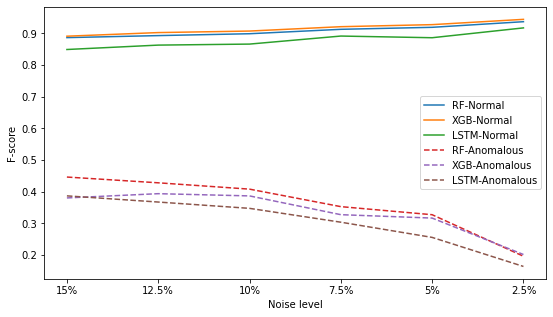

In [33]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(spnormal_fscore['Noise'],spnormal_fscore['RF'], label='RF-Normal')
plt.plot(spnormal_fscore['Noise'],spnormal_fscore['XGB'], label='XGB-Normal')
plt.plot(spnormal_fscore['Noise'],spnormal_fscore['LSTM'], label='LSTM-Normal')

plt.plot(spanomal_fscore['Noise'],spanomal_fscore['RF'],'--', label='RF-Anomalous')
plt.plot(spanomal_fscore['Noise'],spanomal_fscore['XGB'],'--', label='XGB-Anomalous')
plt.plot(spanomal_fscore['Noise'],spanomal_fscore['LSTM'],'--', label='LSTM-Anomalous')


plt.legend()
plt.xlabel('Noise level')
plt.ylabel('F-score')
# plt.ylim(-0.05,1.05)
# plt.title('Next activity prediction ')
plt.savefig('./img/next_activity_prediction_fscore.pdf')

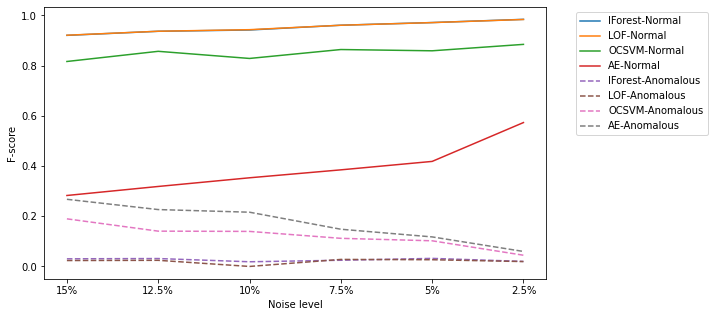

In [57]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['IForest'], label='IForest-Normal')
plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['LOF'], label='LOF-Normal')
plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['OCSVM'], label='OCSVM-Normal')
plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['AE'], label='AE-Normal')


plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['IForest'], '--',label='IForest-Anomalous')
plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['LOF'], '--',label='LOF-Anomalous')
plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['OCSVM'], '--',label='OCSVM-Anomalous')
plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['AE'], '--',label='AE-Anomalous')

plt.legend()
plt.xlabel('Noise level')
plt.ylabel('F-score')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
# plt.tight_layout
# plt.show()
plt.savefig('./img/unsupervised_fscore.pdf', bbox_inches="tight")

Text(0.5, 1.0, 'Precision result')

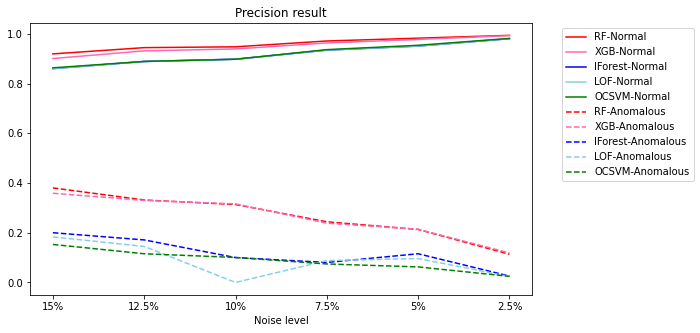

In [105]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(spnormal_precision['Noise'],spnormal_precision['RF'], color='red',label='RF-Normal')
plt.plot(spnormal_precision['Noise'],spnormal_precision['XGB'], color='hotpink',label='XGB-Normal')


plt.plot(unspnormal_precision['Noise'],unspnormal_precision['IForest'], color='blue',label='IForest-Normal')
plt.plot(unspnormal_precision['Noise'],unspnormal_precision['LOF'], color='skyblue',label='LOF-Normal')
plt.plot(unspnormal_precision['Noise'],unspnormal_precision['OCSVM'], color='green',label='OCSVM-Normal')


plt.plot(spanomal_precision['Noise'],spanomal_precision['RF'], '--',color='red',label='RF-Anomalous')
plt.plot(spanomal_precision['Noise'],spanomal_precision['XGB'], '--',color='hotpink',label='XGB-Anomalous')

plt.plot(unspanomal_precision['Noise'],unspanomal_precision['IForest'], '--',color='blue',label='IForest-Anomalous')
plt.plot(unspanomal_precision['Noise'],unspanomal_precision['LOF'], '--',color='skyblue',label='LOF-Anomalous')
plt.plot(unspanomal_precision['Noise'],unspanomal_precision['OCSVM'], '--',color='green',label='OCSVM-Anomalous')

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
# plt.ylim(-0.05,1.05)
plt.xlabel('Noise level')

plt.title('Precision result')


Text(0.5, 1.0, 'Recall result')

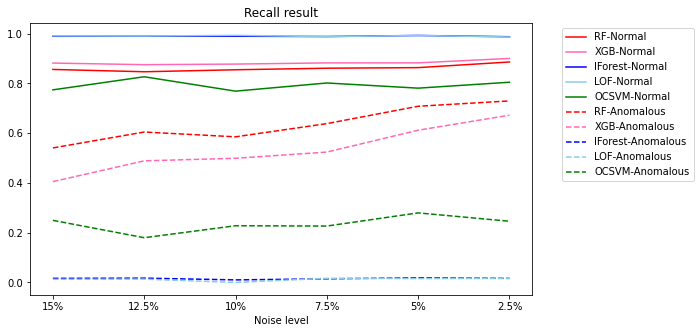

In [106]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(spnormal_recall['Noise'],spnormal_recall['RF'], color='red',label='RF-Normal')
plt.plot(spnormal_recall['Noise'],spnormal_recall['XGB'], color='hotpink',label='XGB-Normal')


plt.plot(unspnormal_recall['Noise'],unspnormal_recall['IForest'], color='blue',label='IForest-Normal')
plt.plot(unspnormal_recall['Noise'],unspnormal_recall['LOF'], color='skyblue',label='LOF-Normal')
plt.plot(unspnormal_recall['Noise'],unspnormal_recall['OCSVM'], color='green',label='OCSVM-Normal')


plt.plot(spanomal_recall['Noise'],spanomal_recall['RF'], '--',color='red',label='RF-Anomalous')
plt.plot(spanomal_recall['Noise'],spanomal_recall['XGB'], '--',color='hotpink',label='XGB-Anomalous')

plt.plot(unspanomal_recall['Noise'],unspanomal_recall['IForest'], '--',color='blue',label='IForest-Anomalous')
plt.plot(unspanomal_recall['Noise'],unspanomal_recall['LOF'], '--',color='skyblue',label='LOF-Anomalous')
plt.plot(unspanomal_recall['Noise'],unspanomal_recall['OCSVM'], '--',color='green',label='OCSVM-Anomalous')

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
# plt.ylim(-0.05,1.05)
plt.xlabel('Noise level')

plt.title('Recall result')


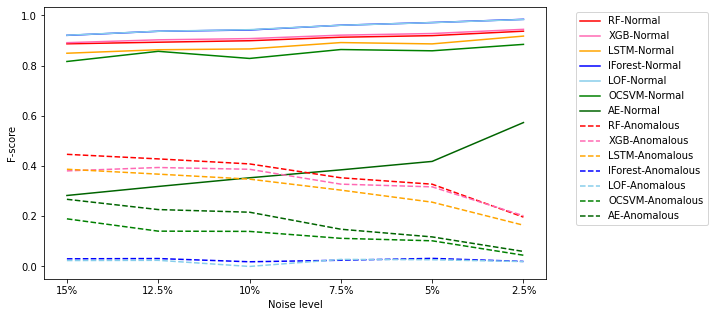

In [60]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(spnormal_fscore['Noise'],spnormal_fscore['RF'], color='red',label='RF-Normal')
plt.plot(spnormal_fscore['Noise'],spnormal_fscore['XGB'], color='hotpink',label='XGB-Normal')
plt.plot(spnormal_fscore['Noise'],spnormal_fscore['LSTM'], color='orange',label='LSTM-Normal')


plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['IForest'], color='blue',label='IForest-Normal')
plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['LOF'], color='skyblue',label='LOF-Normal')
plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['OCSVM'], color='green',label='OCSVM-Normal')
plt.plot(unspnormal_fscore['Noise'],unspnormal_fscore['AE'], color='darkgreen',label='AE-Normal')


plt.plot(spanomal_fscore['Noise'],spanomal_fscore['RF'], '--',color='red',label='RF-Anomalous')
plt.plot(spanomal_fscore['Noise'],spanomal_fscore['XGB'], '--',color='hotpink',label='XGB-Anomalous')
plt.plot(spanomal_fscore['Noise'],spanomal_fscore['LSTM'], '--',color='orange',label='LSTM-Anomalous')

plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['IForest'], '--',color='blue',label='IForest-Anomalous')
plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['LOF'], '--',color='skyblue',label='LOF-Anomalous')
plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['OCSVM'], '--',color='green',label='OCSVM-Anomalous')
plt.plot(unspanomal_fscore['Noise'],unspanomal_fscore['AE'], '--',color='darkgreen',label='AE-Anomalous')

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
# plt.ylim(-0.05,1.05)
plt.xlabel('Noise level')
plt.ylabel('F-score')
plt.savefig('./img/proposed_v.pdf', bbox_inches="tight")

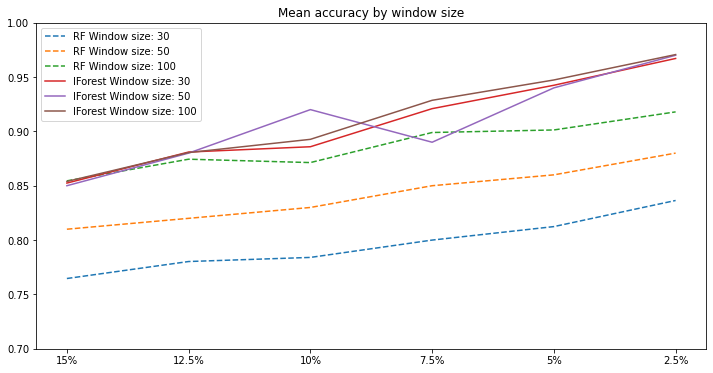

In [30]:
fig = plt.gcf()

fig.set_size_inches(12, 6)
for x in ['30','50','100']:
    plt.plot(rf_accwindow['Noise'], rf_accwindow[x], '--', label = 'RF Window size: %s'%(x))
for x in ['30','50','100']:
    plt.plot(isf_accwindow['Noise'], isf_accwindow[x], label = 'IForest Window size: %s'%(x))
plt.ylim(0.7,1)
plt.legend()
plt.title('Mean accuracy by window size')
plt.show()

## Comparison by window size

In [67]:
rf_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
xgb_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
lstm_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])

rf_normalfscorewindow['Noise'] = noise_list
xgb_normalfscorewindow['Noise'] = noise_list
lstm_normalfscorewindow['Noise'] = noise_list

rf_normalfscorewindow['5%'] = [0.83831,0.857875,0.856198,0.877536,0.878687,0.903659]
rf_normalfscorewindow['10%'] = [0.886579378,0.892951775,0.898873653,0.912810974,0.919115105,0.936860364]
rf_normalfscorewindow['20%'] =[0.915183246,0.928092042,0.926710494,0.944402133,0.946151871,0.956551784]

xgb_normalfscorewindow['5%'] = [0.848244,0.865593,0.866817,0.885855,0.887765,0.91119]
xgb_normalfscorewindow['10%'] = [0.891072,0.902496,0.907318,0.921093,0.927566,0.944253]
xgb_normalfscorewindow['20%'] =[0.913634,0.926448,0.927847,0.947715,0.950701,0.962506]

lstm_normalfscorewindow['5%'] = [0.753091,0.775057,0.786965,0.805175,0.815405,0.85874]
lstm_normalfscorewindow['10%'] = [0.84909,0.862962,0.866179,0.891538,0.886261,0.917285]
lstm_normalfscorewindow['20%'] =[0.86869,0.883251,0.892192,0.912656,0.91055,0.931071]

rf_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
xgb_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
lstm_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])

rf_anomalfscorewindow['Noise'] = noise_list
xgb_anomalfscorewindow['Noise'] = noise_list
lstm_anomalfscorewindow['Noise'] = noise_list

rf_anomalfscorewindow['5%'] = [0.403681,0.397361,0.365881,0.308111,0.256185,0.1513]
rf_anomalfscorewindow['10%'] = [0.446485623,0.428301887,0.408309456,0.353076481,0.327586207,0.196467991]
rf_anomalfscorewindow['20%'] =[0.488089451,0.503908599,0.471929825,0.446130501,0.408278457,0.259204713]

xgb_anomalfscorewindow['5%'] = [0.393642,0.392974,0.362545,0.307988,0.25632,0.158249]
xgb_anomalfscorewindow['10%'] = [0.380563,0.393988,0.386943,0.327698,0.316975,0.20197]
xgb_anomalfscorewindow['20%'] =[0.336134,0.36417,0.375645,0.352178,0.349666,0.236934]

lstm_anomalfscorewindow['5%'] = [0.356445,0.335967,0.31033,0.243009,0.199177,0.11655]
lstm_anomalfscorewindow['10%'] = [0.387075,0.367586,0.347666,0.303951,0.255963,0.164286]
lstm_anomalfscorewindow['20%'] =[0.384918,0.372635,0.360267,0.321602,0.27983,0.170213]


In [68]:
iforest_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
lof_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
ocsvm_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
ae_normalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])

iforest_normalfscorewindow['Noise'] = noise_list
lof_normalfscorewindow['Noise'] = noise_list
ocsvm_normalfscorewindow['Noise'] = noise_list
ae_normalfscorewindow['Noise'] = noise_list

iforest_normalfscorewindow['5%'] = [0.921095,0.936825,0.938767,0.960057,0.971184,0.981005]
iforest_normalfscorewindow['10%'] = [0.920249908,0.936504162,0.941619586,0.960636635,0.971247021,0.983981693]
iforest_normalfscorewindow['20%'] =[0.921019203,0.936370268,0.943251187,0.96291505,0.972898855,0.985089463]

lof_normalfscorewindow['5%'] = [0.933641,0.943872,0.932956,0.945307,0.94165,0.940346]
lof_normalfscorewindow['10%'] = [0.920772,0.936619,0.942854,0.960483,0.971088,0.983483]
lof_normalfscorewindow['20%'] =[0.920708,0.938204,0.944168,0.96202,0.972912,0.986009]

ocsvm_normalfscorewindow['5%'] = [0.771309,0.794006,0.776356,0.815746,0.81542,0.815916]
ocsvm_normalfscorewindow['10%'] = [0.816197,0.856696,0.828295,0.863805,0.858775,0.884341]
ocsvm_normalfscorewindow['20%'] =[0.833748,0.872207,0.860439,0.902958,0.888067,0.91183]

ae_normalfscorewindow['5%'] = [0.32134,0.362008,0.390541,0.41868,0.4394,0.539382]
ae_normalfscorewindow['10%'] = [0.282565,0.3185,0.353053,0.384661,0.418277,0.572965]
ae_normalfscorewindow['20%'] =[0.244967,0.264392,0.299616,0.324706,0.393755,0.535588]

iforest_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
lof_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
ocsvm_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])
ae_anomalfscorewindow = pd.DataFrame(columns=['Noise','5%','10%','20%'])

iforest_anomalfscorewindow['Noise'] = noise_list
lof_anomalfscorewindow['Noise'] = noise_list
ocsvm_anomalfscorewindow['Noise'] = noise_list
ae_anomalfscorewindow['Noise'] = noise_list

iforest_anomalfscorewindow['5%'] = [0.028829,0.029091,0.007143,0.030981,0.032,0.008547]
iforest_anomalfscorewindow['10%'] = [0.030384272,0.031438936,0.018621974,0.024647887,0.032085561,0.02]
iforest_anomalfscorewindow['20%'] =[0.029384757,0.017521902,0.011811024,0.033707865,0.028901734,0.02173913]

lof_anomalfscorewindow['5%'] = [0.093606,0.078712,0.085427,0.066135,0.069065,0.040816]
lof_anomalfscorewindow['10%'] = [0.023529,0.02439,0,0.027972,0.026738,0.019417]
lof_anomalfscorewindow['20%'] =[0.027498,0.032953,0.023715,0.032967,0.011765,0.045198]

ocsvm_anomalfscorewindow['5%'] = [0.204366,0.173041,0.177584,0.137771,0.099683,0.048563]
ocsvm_anomalfscorewindow['10%'] = [0.189566,0.140552,0.139535,0.111967,0.102157,0.044676]
ocsvm_anomalfscorewindow['20%'] =[0.166251,0.128571,0.12993,0.118632,0.084953,0.048123]

ae_anomalfscorewindow['5%'] = [0.272408,0.233453,0.219541,0.155132,0.11858,0.060088]
ae_anomalfscorewindow['10%'] = [0.267399,0.226493,0.216004,0.148184,0.117647,0.059732]
ae_anomalfscorewindow['20%'] =[0.272221,0.224828,0.21177,0.144359,0.116467,0.054496]

C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/116172534.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/116172534.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/116172534.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)


<Figure size 432x288 with 0 Axes>

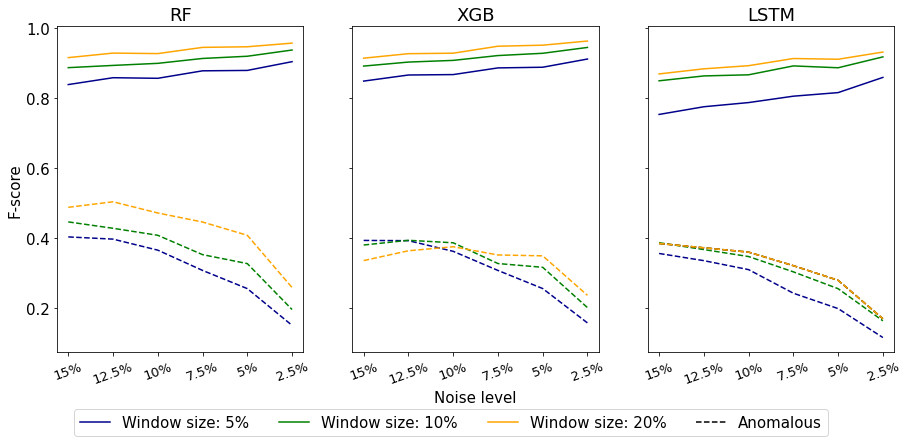

In [69]:
fig = plt.gcf()
plt.rcParams.update({'font.size': 15})

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(15,6)

colordict = {'5%':'darkblue','10%':'green','20%':'orange'}

for x in ['5%','10%','20%']:
    ax1.plot(rf_normalfscorewindow['Noise'], rf_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax1.plot(rf_anomalfscorewindow['Noise'], rf_anomalfscorewindow[x],'--', color = colordict[x])

for x in ['5%','10%','20%']:
    ax2.plot(xgb_normalfscorewindow['Noise'], xgb_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax2.plot(xgb_anomalfscorewindow['Noise'], xgb_anomalfscorewindow[x], '--',color = colordict[x])

for x in ['5%','10%','20%']:
    ax3.plot(lstm_normalfscorewindow['Noise'], lstm_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax3.plot(lstm_anomalfscorewindow['Noise'], lstm_anomalfscorewindow[x], '--',color = colordict[x])

plt.plot(lstm_anomalfscorewindow['Noise'], lstm_anomalfscorewindow[x],'--', color='black', label = 'Anomalous')
ax3.plot(lstm_anomalfscorewindow['Noise'], lstm_anomalfscorewindow[x], '--',color = colordict[x])

ax1.set_title('RF')
ax2.set_title('XGB')
ax3.set_title('LSTM')
    
    
ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)

plt.legend(loc='upper center', bbox_to_anchor=(-0.8, -0.15), ncol=4)

# plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax2.set_xlabel('Noise level')
ax1.set_ylabel('F-score')
# plt.ylim([0.5,1.05])
# plt.title('Normal event F-score by window size')
plt.savefig('./img/proposed_window_comparison.pdf', bbox_inches="tight")

C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/462595611.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/462595611.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/462595611.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/462595611.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(noise_list, rotation=20,fontsize =13)


<Figure size 432x288 with 0 Axes>

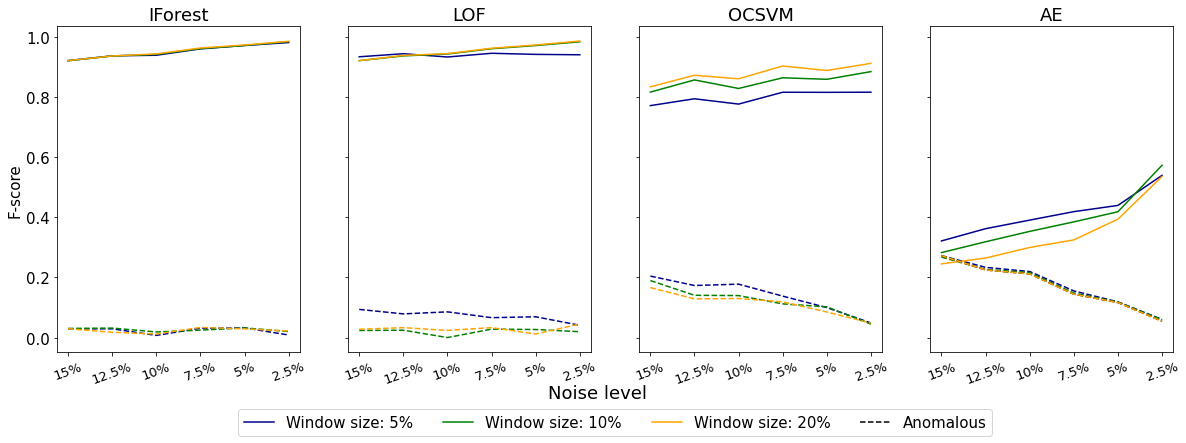

In [70]:
fig = plt.gcf()
plt.rcParams.update({'font.size': 15})

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True)
fig.set_size_inches(20,6)

colordict = {'5%':'darkblue','10%':'green','20%':'orange'}

for x in ['5%','10%','20%']:
    ax1.plot(iforest_normalfscorewindow['Noise'], iforest_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax1.plot(iforest_anomalfscorewindow['Noise'], iforest_anomalfscorewindow[x],'--',color = colordict[x])

for x in ['5%','10%','20%']:
    ax2.plot(lof_normalfscorewindow['Noise'], lof_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax2.plot(lof_anomalfscorewindow['Noise'], lof_anomalfscorewindow[x], '--',color = colordict[x])

for x in ['5%','10%','20%']:
    ax3.plot(ocsvm_normalfscorewindow['Noise'], ocsvm_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax3.plot(ocsvm_anomalfscorewindow['Noise'], ocsvm_anomalfscorewindow[x], '--',color = colordict[x])

for x in ['5%','10%','20%']:
    ax4.plot(ae_normalfscorewindow['Noise'], ae_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax4.plot(ae_anomalfscorewindow['Noise'], ae_anomalfscorewindow[x], '--',color = colordict[x])

plt.plot(ae_anomalfscorewindow['Noise'], ae_anomalfscorewindow[x],'--', color='black', label = 'Anomalous')
ax4.plot(ae_anomalfscorewindow['Noise'], ae_anomalfscorewindow[x], '--',color = colordict[x])

ax1.set_title('IForest')
ax2.set_title('LOF')
ax3.set_title('OCSVM')
ax4.set_title('AE')
    
ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax4.set_xticklabels(noise_list, rotation=20,fontsize =13)

plt.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.15), ncol=5)

fig.supxlabel('Noise level')
ax1.set_ylabel('F-score')
# plt.ylim([0.5,1.05])
# plt.title('Normal event F-score by window size')
plt.savefig('./img/unsupervised_window_comparison.pdf', bbox_inches="tight")

## Comparison by retraining interval

In [44]:
col_retraining = ['Noise', '0%','10%','20%','30%','40%','50%']

rf_normalfscorewindow = pd.DataFrame(columns=col_retraining)
xgb_normalfscorewindow = pd.DataFrame(columns=col_retraining)
lstm_normalfscorewindow = pd.DataFrame(columns=col_retraining)

rf_normalfscorewindow['Noise'] = noise_list
xgb_normalfscorewindow['Noise'] = noise_list
lstm_normalfscorewindow['Noise'] = noise_list

rf_normalfscorewindow['0%'] = [0.880885,0.894595,0.891697,0.914952,0.917065,0.932512]
rf_normalfscorewindow['10%'] = [0.88515,0.897248,0.897246,0.913685,0.919327,0.935998]
rf_normalfscorewindow['20%'] =[0.886579378,0.892951775,0.898873653,0.912810974,0.919115105,0.936860364]
rf_normalfscorewindow['30%'] =[0.889969,0.899956,0.895926,0.916016,0.918824,0.9388]
rf_normalfscorewindow['40%'] =[0.888018,0.898577,0.900641,0.918672,0.922362,0.940691]
rf_normalfscorewindow['50%'] =[0.863629,0.855709,0.85334,0.870905,0.869988,0.896982]

xgb_normalfscorewindow['0%'] = [0.887839,0.901921,0.901312,0.92133,0.925761,0.940608]
xgb_normalfscorewindow['10%'] = [0.889048,0.90414,0.906648,0.921202,0.926416,0.943577]
xgb_normalfscorewindow['20%'] =[0.891072,0.902496,0.907318,0.921093,0.927566,0.944253]
xgb_normalfscorewindow['30%'] = [0.893883,0.908239,0.906006,0.923669,0.926239,0.94662]
xgb_normalfscorewindow['40%'] = [0.894129,0.907363,0.909091,0.925262,0.930745,0.948707]
xgb_normalfscorewindow['50%'] =[0.895124,0.906882,0.907729,0.925854,0.930449,0.94861]

lstm_normalfscorewindow['0%'] = [0.847223,0.865265,0.863379,0.888438,0.889782,0.917771]
lstm_normalfscorewindow['10%'] = [0.846786,0.86517,0.869068,0.891759,0.893707,0.919623]
lstm_normalfscorewindow['20%'] =[0.84909,0.862962,0.866179,0.891538,0.886261,0.917285]
lstm_normalfscorewindow['30%'] = [0.855085,0.868878,0.869244,0.888374,0.888829,0.921191]
lstm_normalfscorewindow['40%'] = [0.850803,0.872507,0.865995,0.89284,0.896149,0.920598]
lstm_normalfscorewindow['50%'] =[0.853695,0.868177,0.882239,0.89351,0.899519,0.923174]

rf_anomalfscorewindow = pd.DataFrame(columns=col_retraining)
xgb_anomalfscorewindow = pd.DataFrame(columns=col_retraining)
lstm_anomalfscorewindow = pd.DataFrame(columns=col_retraining)

rf_anomalfscorewindow['Noise'] = noise_list
xgb_anomalfscorewindow['Noise'] = noise_list
lstm_anomalfscorewindow['Noise'] = noise_list

rf_anomalfscorewindow['0%'] = [0.432474,0.431978,0.395973,0.358621,0.319328,0.198985]
rf_anomalfscorewindow['10%'] = [0.448693,0.436485,0.414651,0.358447,0.333333,0.205348]
rf_anomalfscorewindow['20%'] =[0.446485623,0.428301887,0.408309456,0.353076481,0.327586207,0.196467991]
rf_anomalfscorewindow['30%'] = [0.455583,0.438588,0.400572,0.35876,0.335244,0.197248]
rf_anomalfscorewindow['40%'] = [0.448007,0.441468,0.417097,0.364865,0.330053,0.201183]
rf_anomalfscorewindow['50%'] =[0.447899,0.432596,0.407681,0.366667,0.335119,0.215159]

xgb_anomalfscorewindow['0%'] = [0.377078,0.392632,0.3764,0.332056,0.312256,0.197022]
xgb_anomalfscorewindow['10%'] = [0.380151,0.397209,0.387198,0.333973,0.314376,0.202654]
xgb_anomalfscorewindow['20%'] =[0.380563,0.393988,0.386943,0.327698,0.316975,0.20197]
xgb_anomalfscorewindow['30%'] = [0.381665,0.400906,0.387917,0.336011,0.3168,0.2]
xgb_anomalfscorewindow['40%'] = [0.388158,0.398629,0.391412,0.339053,0.324598,0.207268]
xgb_anomalfscorewindow['50%'] =[0.384837,0.393764,0.383653,0.339596,0.326809,0.206522]

lstm_anomalfscorewindow['0%'] = [0.382363,0.381342,0.344379,0.300391,0.261277,0.163877]
lstm_anomalfscorewindow['10%'] = [0.380597,0.372345,0.357317,0.307461,0.274416,0.162113]
lstm_anomalfscorewindow['20%'] =[0.387075,0.367586,0.347666,0.303951,0.255963,0.164286]
lstm_anomalfscorewindow['30%'] = [0.388412,0.370144,0.363749,0.292658,0.263815,0.159242]
lstm_anomalfscorewindow['40%'] = [0.392405,0.380527,0.339695,0.303347,0.267258,0.159242]
lstm_anomalfscorewindow['50%'] =[0.396274,0.364937,0.372509,0.299255,0.276943,0.168133]


In [49]:
col_retraining = ['Noise', '0%','10%','20%','30%','40%','50%']

iforest_normalfscorewindow = pd.DataFrame(columns=col_retraining)
lof_normalfscorewindow = pd.DataFrame(columns=col_retraining)
ocsvm_normalfscorewindow = pd.DataFrame(columns=col_retraining)
ae_normalfscorewindow = pd.DataFrame(columns=col_retraining)

iforest_normalfscorewindow['Noise'] = noise_list
lof_normalfscorewindow['Noise'] = noise_list
ocsvm_normalfscorewindow['Noise'] = noise_list
ae_normalfscorewindow['Noise'] = noise_list

iforest_normalfscorewindow['0%'] = [0.919942,0.936594,0.943551,0.960728,0.971335,0.983643]
iforest_normalfscorewindow['10%'] = [0.920154,0.937034,0.942667,0.959368,0.971793,0.983466]
iforest_normalfscorewindow['20%'] =[0.920249908,0.936504162,0.941619586,0.960636635,0.971247021,0.983981693]
iforest_normalfscorewindow['30%'] = [0.920924,0.937485,0.943624,0.961125,0.971442,0.982894]
iforest_normalfscorewindow['40%'] = [0.921291,0.937054,0.942325,0.962271,0.971516,0.983369]
iforest_normalfscorewindow['50%'] =[0.921102,0.936953,0.944024,0.961151,0.972623,0.982075]

lof_normalfscorewindow['0%'] = [0.911867,0.922461,0.923163,0.950794,0.95692,0.969652]
lof_normalfscorewindow['10%'] = [0.910913,0.923903,0.925138,0.948127,0.957735,0.97106]
lof_normalfscorewindow['20%'] =[0.920772,0.936619,0.942854,0.960483,0.971088,0.983483]
lof_normalfscorewindow['30%'] = [0.912289,0.924548,0.928473,0.951492,0.955916,0.971207]
lof_normalfscorewindow['40%'] = [0.91066,0.925813,0.931163,0.950919,0.956651,0.971685]
lof_normalfscorewindow['50%'] =[0.910517,0.927401,0.930616,0.953053,0.956922,0.971849]

ocsvm_normalfscorewindow['0%'] = [0.809955,0.847162,0.829615,0.85895,0.858173,0.879367]
ocsvm_normalfscorewindow['10%'] = [0.813865,0.849701,0.832344,0.860326,0.861813,0.884938]
ocsvm_normalfscorewindow['20%'] =[0.816197,0.856696,0.828295,0.863805,0.858775,0.884341]
ocsvm_normalfscorewindow['30%'] = [0.823588,0.849907,0.838929,0.8686,0.859383,0.882133]
ocsvm_normalfscorewindow['40%'] = [0.816531,0.857067,0.844467,0.865511,0.859791,0.887039]
ocsvm_normalfscorewindow['50%'] =[0.819695,0.855093,0.846371,0.861506,0.864453,0.879039]

ae_normalfscorewindow['0%'] = [0.282119,0.311523,0.344066,0.393318,0.432595,0.562847]
ae_normalfscorewindow['10%'] = [0.276342,0.323786,0.353672,0.383673,0.434159,0.561244]
ae_normalfscorewindow['20%'] =[0.282565,0.3185,0.353053,0.384661,0.418277,0.572965]
ae_normalfscorewindow['30%'] = [0.259876,0.314476,0.338924,0.369065,0.431322,0.572914]
ae_normalfscorewindow['40%'] = [0.297294,0.305736,0.328364,0.374049,0.405629,0.543689]
ae_normalfscorewindow['50%'] =[0.278102,0.307692,0.357849,0.390461,0.428459,0.571704]

iforest_anomalfscorewindow = pd.DataFrame(columns=col_retraining)
lof_anomalfscorewindow = pd.DataFrame(columns=col_retraining)
ocsvm_anomalfscorewindow = pd.DataFrame(columns=col_retraining)
ae_anomalfscorewindow = pd.DataFrame(columns=col_retraining)

iforest_anomalfscorewindow['Noise'] = noise_list
lof_anomalfscorewindow['Noise'] = noise_list
ocsvm_anomalfscorewindow['Noise'] = noise_list
ae_anomalfscorewindow['Noise'] = noise_list

iforest_anomalfscorewindow['0%'] = [0.029772,0.016908,0.02243,0.02773,0.036842,0]
iforest_anomalfscorewindow['10%'] = [0.01434,0.014493,0.008097,0.022495,0.018576,0.008065]
iforest_anomalfscorewindow['20%'] =[0.030384272,0.031438936,0.018621974,0.024647887,0.032085561,0.02]
iforest_anomalfscorewindow['30%'] = [0.020183,0.027397,0.011765,0.010949,0.016575,0.009569]
iforest_anomalfscorewindow['40%'] = [0.020503,0.017722,0.003922,0.022514,0.027624,0]
iforest_anomalfscorewindow['50%'] =[0.016933,0.01027,0.004082,0.01845,0.04023,0.018433]

lof_anomalfscorewindow['0%'] = [0.058314,0.065574,0.065306,0.049724,0.072664,0.051414]
lof_anomalfscorewindow['10%'] = [0.058085,0.059465,0.06993,0.052632,0.074205,0.054054]
lof_anomalfscorewindow['20%'] = [0.051077,0.066265,0.071023,0.050938,0.074703,0.049587]
lof_anomalfscorewindow['30%'] = [0.050654,0.070493,0.063253,0.045911,0.059441,0.05]
lof_anomalfscorewindow['40%'] = [0.050325,0.066597,0.063291,0.045911,0.071048,0.045714]
lof_anomalfscorewindow['50%'] = [0.055195,0.056216,0.066561,0.039514,0.058501,0.057307]

ocsvm_anomalfscorewindow['0%'] = [0.190309,0.144788,0.153471,0.122449,0.091268,0.049054]
ocsvm_anomalfscorewindow['10%'] = [0.190065,0.140524,0.153558,0.123153,0.103211,0.045926]
ocsvm_anomalfscorewindow['20%'] = [0.189566,0.140552,0.139535,0.111967,0.102157,0.044676]
ocsvm_anomalfscorewindow['30%'] = [0.188723,0.133469,0.144289,0.114316,0.100346,0.048637]
ocsvm_anomalfscorewindow['40%'] = [0.181681,0.127775,0.141358,0.108511,0.100292,0.044857]
ocsvm_anomalfscorewindow['50%'] = [0.183855,0.12931,0.150355,0.114286,0.100973,0.045555]

ae_anomalfscorewindow['0%'] = [0.270721,0.226814,0.213997,0.148172,0.121341,0.058706]
ae_anomalfscorewindow['10%'] = [0.269298,0.230515,0.216438,0.147443,0.119742,0.058676]
ae_anomalfscorewindow['20%'] = [0.267399,0.226493,0.216004,0.148184,0.117647,0.059732]
ae_anomalfscorewindow['30%'] = [0.266539,0.225533,0.215641,0.14439,0.120683,0.060811]
ae_anomalfscorewindow['40%'] = [0.269475,0.224625,0.211803,0.145754,0.116865,0.056698]
ae_anomalfscorewindow['50%'] = [0.26753,0.226563,0.217349,0.146975,0.120955,0.06019]

C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/1669997504.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/1669997504.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/1669997504.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)


<Figure size 432x288 with 0 Axes>

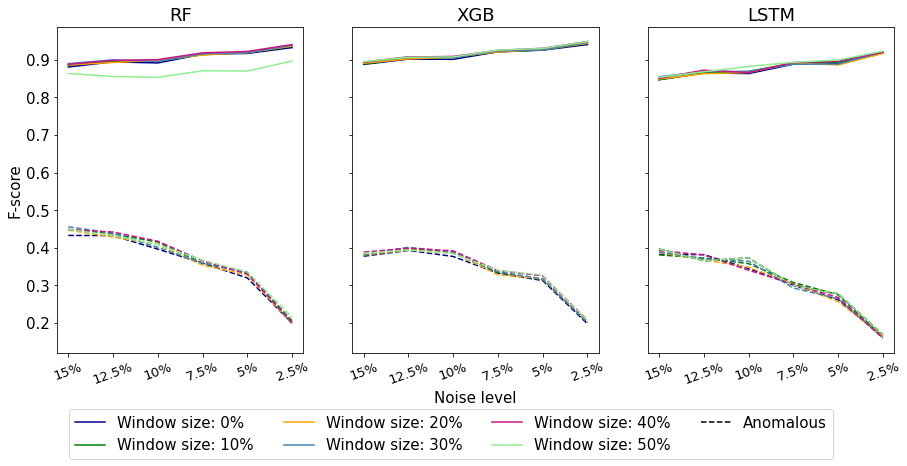

In [65]:
fig = plt.gcf()
plt.rcParams.update({'font.size': 15})

col_retraining = ['0%','10%','20%','30%','40%','50%']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(15,6)

colordict = {'0%':'darkblue','10%':'green','20%':'orange', '30%':'steelblue','40%':'mediumvioletred', '50%':'lightgreen'}

for x in col_retraining:
    ax1.plot(rf_normalfscorewindow['Noise'], rf_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax1.plot(rf_anomalfscorewindow['Noise'], rf_anomalfscorewindow[x],'--', color = colordict[x])

for x in col_retraining:
    ax2.plot(xgb_normalfscorewindow['Noise'], xgb_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax2.plot(xgb_anomalfscorewindow['Noise'], xgb_anomalfscorewindow[x], '--',color = colordict[x])

for x in col_retraining:
    ax3.plot(lstm_normalfscorewindow['Noise'], lstm_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax3.plot(lstm_anomalfscorewindow['Noise'], lstm_anomalfscorewindow[x], '--',color = colordict[x])

plt.plot(lstm_anomalfscorewindow['Noise'], lstm_anomalfscorewindow[x],'--', color='black', label = 'Anomalous')
ax3.plot(lstm_anomalfscorewindow['Noise'], lstm_anomalfscorewindow[x], '--',color = colordict[x])

ax1.set_title('RF')
ax2.set_title('XGB')
ax3.set_title('LSTM')
    
ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)

plt.legend(loc='upper center', bbox_to_anchor=(-0.8, -0.15), ncol=4)

# plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax2.set_xlabel('Noise level')
ax1.set_ylabel('F-score')
# plt.ylim([0.5,1.05])
# plt.title('Normal event F-score by window size')
plt.savefig('./img/proposed_retraining_comparison.pdf', bbox_inches="tight")

C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/293108614.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/293108614.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/293108614.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)
C:\Users\SUHWAN~1\AppData\Local\Temp/ipykernel_14040/293108614.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(noise_list, rotation=20,fontsize =13)


<Figure size 432x288 with 0 Axes>

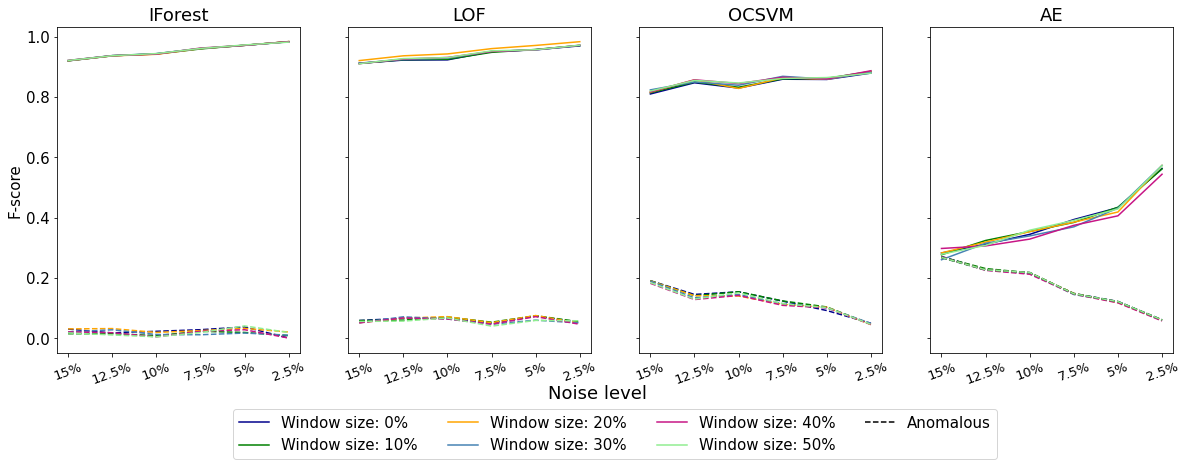

In [64]:
fig = plt.gcf()
plt.rcParams.update({'font.size': 15})

col_retraining = ['0%','10%','20%','30%','40%','50%']

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True)
fig.set_size_inches(20,6)

colordict = {'0%':'darkblue','10%':'green','20%':'orange', '30%':'steelblue','40%':'mediumvioletred', '50%':'lightgreen'}

for x in col_retraining:
    ax1.plot(iforest_normalfscorewindow['Noise'], iforest_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax1.plot(iforest_anomalfscorewindow['Noise'], iforest_anomalfscorewindow[x],'--',color = colordict[x])

for x in col_retraining:
    ax2.plot(lof_normalfscorewindow['Noise'], lof_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax2.plot(lof_anomalfscorewindow['Noise'], lof_anomalfscorewindow[x], '--',color = colordict[x])

for x in col_retraining:
    ax3.plot(ocsvm_normalfscorewindow['Noise'], ocsvm_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax3.plot(ocsvm_anomalfscorewindow['Noise'], ocsvm_anomalfscorewindow[x], '--',color = colordict[x])

for x in col_retraining:
    ax4.plot(ae_normalfscorewindow['Noise'], ae_normalfscorewindow[x], color = colordict[x],label = 'Window size: %s'%(x))
    ax4.plot(ae_anomalfscorewindow['Noise'], ae_anomalfscorewindow[x], '--',color = colordict[x])

plt.plot(ae_anomalfscorewindow['Noise'], ae_anomalfscorewindow[x],'--', color='black', label = 'Anomalous')
ax4.plot(ae_anomalfscorewindow['Noise'], ae_anomalfscorewindow[x], '--',color = colordict[x])

ax1.set_title('IForest')
ax2.set_title('LOF')
ax3.set_title('OCSVM')
ax4.set_title('AE')
    
ax1.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax2.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax3.set_xticklabels(noise_list, rotation=20,fontsize =13)
ax4.set_xticklabels(noise_list, rotation=20,fontsize =13)

plt.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.15), ncol=4)

fig.supxlabel('Noise level')
ax1.set_ylabel('F-score')
# plt.ylim([0.5,1.05])
# plt.title('Normal event F-score by window size')
plt.savefig('./img/unsupervised_retraining_comparison.pdf', bbox_inches="tight")